In [2]:
from IPython.display import Image

The shell gives us a way to specify groups of files by creating patterns to match filenames. The patterns we create to match filenames are called [glob patterns](https://en.wikipedia.org/wiki/Glob_%28programming%29).This works in a similar way to regular expressions, only the characters used and their roles are a bit different. Glob patterns are built from special characters called [wildcards](https://en.wikipedia.org/wiki/Wildcard_character), and from regular characters.

Before we see how all of this works in the shell, let's see it on Google's search engine! In the gif below, we look for exact matches of the sequence of words Largest * in the world. The character * is one example of a wildcard, it acts as a placeholder for any word. In fact, it is a placeholder for any number of characters, including zero characters and spaces, which means it can also match several words.

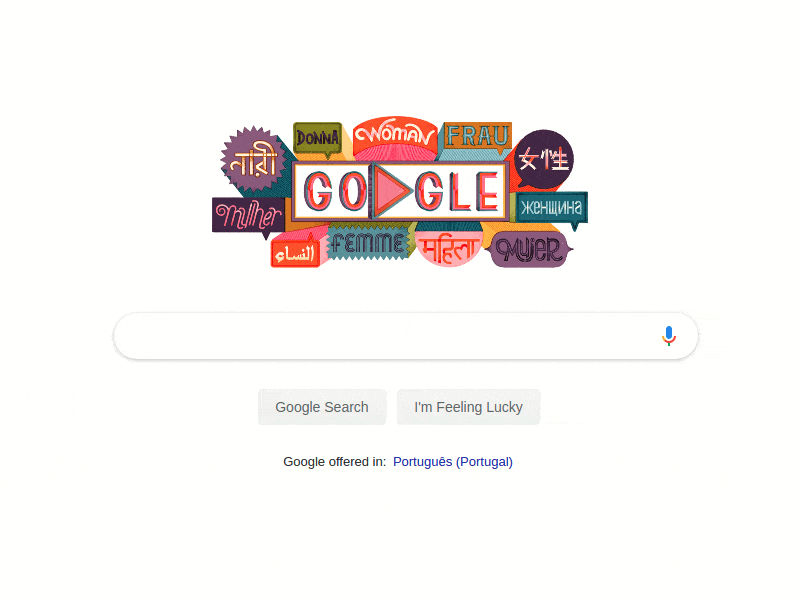

In [3]:
Image("google_search.gif")

In the shell, the behavior of * is almost the same: it will match any character, any number of times, except for leading dots (.). To draw a parallel with regular expressions, * behaves like the regex pattern .*, although there are some differences.

Passing * as an argument to ls will cause it to list all non-hidden files and directories in the working directory, plus all files at the root of the listed directories.

/home/learn$ ls *

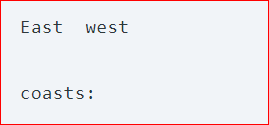

Here's what happens in the background:

1. For each file/directory, the shell checks to see if * matches its name. As we've learned, it will match every name except for the names of any hidden files.
2. The names that are matched are passed as parameters to ls. Since the matched names are coasts, East, and west, running ls * in this instance is the same as running ls coasts East west.
3. Therefore, the contents of coasts are listed (it happens to be empty), in addition to the contents of the working directory.
4. To facilitate reading, the results are [pretty-printed](https://en.wikipedia.org/wiki/Prettyprint).

Wildcards can also be used in conjunction with other characters to form more complex patterns, just like regular expressions. This is done by [concatenating](https://en.wikipedia.org/wiki/Concatenation) wildcards with other characters in a way that fits our intent.

Say we want to list all the files (or directory content) in /home/learn with names ending in st. This can be done by running ls *st. It is the concatenation of the wildcard * with st. 

We mentioned that the wildcard * behaves like the regex pattern .*, despite being different in some cases. In the regular expressions we learned that . by itself matches (almost) any character exactly one time, while appending * makes it match (almost) any character any number of times.

There's also a wildcard equivalent of ., again, with some differences. It is the character ?.

The wildcard ? matches any character exactly one time. For example, if we use the pattern ?its, it will match any filename that is four characters long and ends with its. Other examples include @its, fits, and hits, as well as many others.

We used the pattern w??t, which matches any four-character word that starts with w and ends with t. Because west is the only file/directory with a name that conforms to these rules, the output is west.

We may wonder what happens when a filename uses the character ? (or *, for that matter) in its name.

Just like in regular expressions, we have the possibility of using a character's literal meaning (as opposed to its special meaning) by "escaping" it with a backslash (\). In these circumstances, a backslash is called an [escape character](https://en.wikipedia.org/wiki/Escape_character).

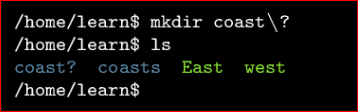

Listing all file and directory content names that are six characters long, start with coast, and end with a question mark by running ls coast? will match both coasts and coast?

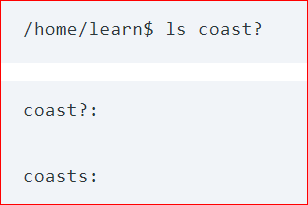

If we want it to only match coast?, we need to escape ?

/home/learn$ ls coast\?

We can also escape special characters by using single quotes around the word we're trying to escape. So, what we did above could also be achieved with mkdir 'coast?' and ls 'coast?'. Escaping * works in a similar manner.

We also have a wildcard that allows us to match specific characters, as opposed to any character. We call it the square brackets wildcard. In order to match either a, i, or u, we can use the wildcard [aiu]. This will match only one occurrence, just like ?.

Say we want to list all files or directory content with names that start with either a, i, or u. We can do so by running ls [aiu]*. The wildcard [aiu] will ensure that the name of the file/directory starts with one of the listed vowels, while * will match everything that follows.

**Note:** lowercase letters are different characters from uppercase ones, we need to take this into account in the patterns we create.

The behavior of [] is similar in regular expressions. If we recall from regular expressions, the pattern [^aiu] matches any character that isn't a, i, or u. Wildcards are endowed with a similar power, only it is **!** instead of ^. So, for example, the pattern Waq[!aA]s will match any variation of the pattern Waq?s, in which the fifth character is not a and is not A.

We should also be mindful of what happens when we use a pattern that doesn't match anything together with ls.

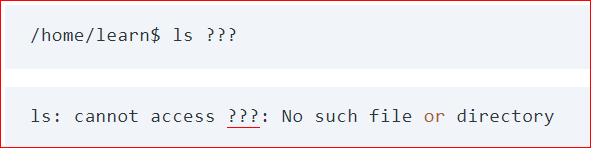

Since there aren't any files or directories in the working directory with names that are three characters long, ??? didn't match any filename, and so ??? was passed as an argument to ls without its special meaning. This led the shell to try and list a file/directory that was literally called ???, hence the error message.

We may remember that, when using regular expressions, we can refer to sets of characters instead of listing them explicitly. The same functionality exists in the shell's glob patterns. We can use characters ranges like [a-z], [A-Z], [0-9], [a-Z], and even [a-0].

We can also use character classes like [:alpha:] (the usual letters), [:digit:] (the numbers 0 through 9), [:lower:] (lowercase letters), [:upper:] (uppercase letters), and [:alnum:] (letters and numbers). We can read more about character classes [here](https://www.gnu.org/software/grep/manual/html_node/Character-Classes-and-Bracket-Expressions.html).

Character ranges and character classes are not square bracket wildcards. They are wildcards just like ? or *, although they must be used inside square brackets, otherwise they will be interpreted literally. A couple of usage examples are:

* To list all files (and the content of directories) in the working directory with names that end in ., directly followed by three lowercase letters, we can run ls *.[[:lower:]][[:lower:]][[:lower:]].
* To list all files (and the content of directories) in the working directory with names that do not start with an uppercase letter and end with a number, we can run ls [![:upper:]]*[[:digit:]].

We do not recommend using character ranges, and we should also be careful with character classes. Here's an example that illustrates why we say this:

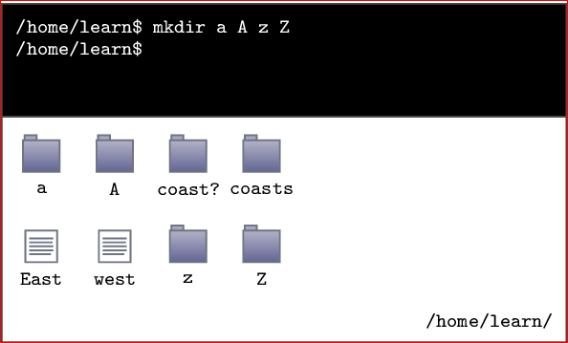

Trying to capture the contents of a and z by using the character range [a-z] yields some unintuitive results:

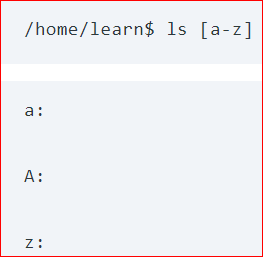

It output A (which was unexpected) and not Z (which was expected, but odd given that A was printed). This happened because of something called locale.

The POSIX documentation defines [locale](https://pubs.opengroup.org/onlinepubs/9699919799/basedefs/V1_chap07.html#tag_07_01) as "a definition of the subset of a user's environment that depends on language and cultural conventions." This refers to, among other things, settings like keyboard layout, date and time formats, currency, and also the order of characters.

The reason why Z wasn't output and A was is that, in this platform, the locale settings are such that A is in the range [a-z] and Z isn't. 

A safer bet is to use character classes:

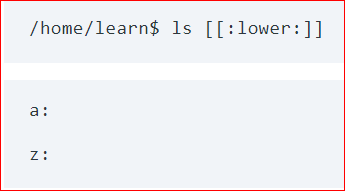

But even those aren't without issues unless the system uses a [POSIX compliant locale](https://pubs.opengroup.org/onlinepubs/9699919799/basedefs/V1_chap07.html#tag_07_03_01). This can be hard as we get further and further away from American standards.

We've only used wildcards with the ls command, but they work with most commands that we've learned so far: cp, mv, rm, and rmdir, to name a few.

We reiterate that we should be very careful when using wildcards with commands like rm, cp and mv, as they can have disastrous consequences. Before using filesystem-altering commands with wildcards, make sure they'll work as we intend by using them with ls first.

Here is a table that summarizes and exemplifies some of what we've learned about wildcards.

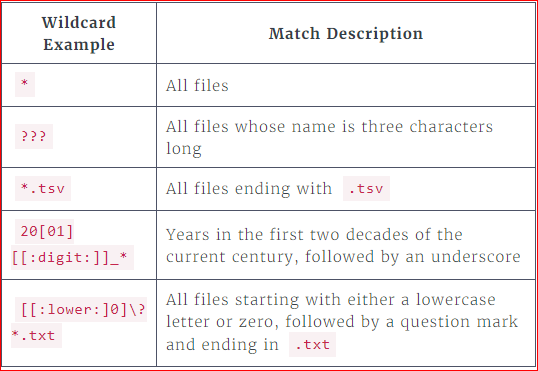

Questions:

Move all the files into their respective directories:
* All HTML files should be moved into html_files.
* All data not pertaining to 2019 should be moved into archive.
* The remaining files should be moved into data.

Answers:

* mv *l html_files
* mv 201[!9]* archive
* mv 2019* data

One basic functionality of using a GUI to interact with the filesystem that we haven't explored yet is searching for files.

We can search for files by using the find command. This command is extremely powerful — in addition to letting us search for files by name, it allows to search for files by:

* Last time the file was accessed
* Last time the file was modified
* What type of file it is (directory, regular file, special file, etc.)

And many other criteria. It also allows us to perform actions on the files that are found.

We will only learn how to use find to search by name, but it's good to know how powerful it can be.

A simplified usage of this command looks like find [location] -name ['filename']. Let's break this down:

* find refers to the command itself.
* location refers to the directory in which we'll perform the search.
 * It will also include all subdirectories of this directory.
* -name tells find that the criteria we're using is the filename.
* 'filename' is the name of the file that we're searching for.

Let's try using the find command to locate all the files named East in the whole system.

/home/dq/learn$ find / -name 'East'

Recall that / indicates the root of the filesystem; this will ensure that we're looking in the entire system. And here's the output:

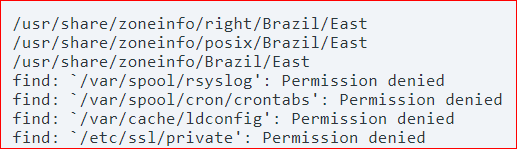

Quite a confusing output! Let's understand it: the results we're interested in are in the lines that do not end with "Permission denied." They are:

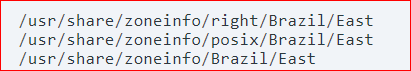

The command returned the path of all files named East to us. The other lines are simply directories which we can't access due to lack of permissions, hence the error messages.

When searching for files, GUI will usually ignore case. We can do the same with find by using -iname instead of -name. Running find / -iname east would find all of the results we got above, perhaps more (if there happens to be any file named east).

In the following example, we're going to use a glob pattern to search for any files or directories in /home with names that are two characters long and end with q:

/home/learn$ find /home -name '?q'

We may have noticed that we used single quotes throughout the examples. To ensure that **find** behaves as we expect it to with regards to wildcards, we should use single quotes.

Question:

Find all files in the system that end with .b64 and move them into your home directory.

Answer:

find / -name "*.b64" 

mv /sqlite-autoconf-3210000/tea/win/you_found_it.b64 ~